# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 594


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}&q={city}'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        continue
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | amderma
City not found. Skipping...
Processing Record 2 of Set 1 | san patricio
Processing Record 3 of Set 1 | samusu
City not found. Skipping...
Processing Record 4 of Set 1 | busselton
Processing Record 5 of Set 1 | caravelas
Processing Record 6 of Set 1 | belaya gora
Processing Record 7 of Set 1 | angoram
Processing Record 8 of Set 1 | bluff
Processing Record 9 of Set 1 | kodiak
Processing Record 10 of Set 1 | klaksvik
Processing Record 11 of Set 1 | samarai
Processing Record 12 of Set 1 | georgetown
Processing Record 13 of Set 1 | tuktoyaktuk
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | imeni babushkina
Processing Record 17 of Set 1 | ancud
Processing Record 18 of Set 1 | siniscola
Processing Record 19 of Set 1 | altamira
Processing Record 20 of Set 1 | albany
Processing Record 21 of Set 1 | yar-sale
Processing Record 22 

Processing Record 37 of Set 4 | margate
Processing Record 38 of Set 4 | pangnirtung
Processing Record 39 of Set 4 | tuzha
Processing Record 40 of Set 4 | yumen
Processing Record 41 of Set 4 | puro
Processing Record 42 of Set 4 | esperance
Processing Record 43 of Set 4 | yankton
Processing Record 44 of Set 4 | la palma
Processing Record 45 of Set 4 | hikone
Processing Record 46 of Set 4 | termiz
Processing Record 47 of Set 4 | kodarma
Processing Record 48 of Set 4 | natchez
Processing Record 49 of Set 4 | kenai
Processing Record 0 of Set 5 | san andres
Processing Record 1 of Set 5 | bredy
Processing Record 2 of Set 5 | shingu
Processing Record 3 of Set 5 | sentyabrskiy
City not found. Skipping...
Processing Record 4 of Set 5 | isla pucu
Processing Record 5 of Set 5 | nanzhou
Processing Record 6 of Set 5 | altay
Processing Record 7 of Set 5 | ous
Processing Record 8 of Set 5 | harindanga
Processing Record 9 of Set 5 | qasigiannguit
Processing Record 10 of Set 5 | geraldton
Processing Rec

Processing Record 28 of Set 8 | buarcos
Processing Record 29 of Set 8 | luderitz
Processing Record 30 of Set 8 | vikulovo
Processing Record 31 of Set 8 | clyde river
Processing Record 32 of Set 8 | tessalit
Processing Record 33 of Set 8 | sabla
Processing Record 34 of Set 8 | hasaki
Processing Record 35 of Set 8 | sao joao da barra
Processing Record 36 of Set 8 | olafsvik
Processing Record 37 of Set 8 | san cosme y damian
Processing Record 38 of Set 8 | ellisras
Processing Record 39 of Set 8 | buariki
City not found. Skipping...
Processing Record 40 of Set 8 | tarrafal
Processing Record 41 of Set 8 | victor harbor
Processing Record 42 of Set 8 | roald
Processing Record 43 of Set 8 | nguiu
City not found. Skipping...
Processing Record 44 of Set 8 | brownwood
Processing Record 45 of Set 8 | fomboni
Processing Record 46 of Set 8 | raub
Processing Record 47 of Set 8 | rzeszow
Processing Record 48 of Set 8 | bull savanna
Processing Record 49 of Set 8 | antofagasta
Processing Record 0 of Set

Processing Record 12 of Set 12 | bristol
Processing Record 13 of Set 12 | port arthur
Processing Record 14 of Set 12 | jardim
Processing Record 15 of Set 12 | la ronge
Processing Record 16 of Set 12 | santa vitoria do palmar
Processing Record 17 of Set 12 | velikiy ustyug
Processing Record 18 of Set 12 | hofn
Processing Record 19 of Set 12 | rudozem
Processing Record 20 of Set 12 | tete
Processing Record 21 of Set 12 | severobaykalsk
Processing Record 22 of Set 12 | severo-kurilsk
Processing Record 23 of Set 12 | zlatoustovsk
City not found. Skipping...
Processing Record 24 of Set 12 | grand-santi
Processing Record 25 of Set 12 | moussoro
Processing Record 26 of Set 12 | tiko
Processing Record 27 of Set 12 | bilma
Processing Record 28 of Set 12 | presidencia roque saenz pena
Processing Record 29 of Set 12 | goksun
Processing Record 30 of Set 12 | pacific grove
Processing Record 31 of Set 12 | saint-georges
Processing Record 32 of Set 12 | alghero
Processing Record 33 of Set 12 | tucuru

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          542
Lat           542
Lng           542
Max Temp      542
Humidity      542
Cloudiness    542
Wind Speed    542
Country       542
Date          542
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,san patricio,28.0170,-97.5169,70.39,93,94,10.09,US,1675831130
1,busselton,-33.6500,115.3333,82.53,44,0,8.59,AU,1675831130
2,caravelas,-17.7125,-39.2481,75.63,85,42,6.17,BR,1675831131
3,belaya gora,68.5333,146.4167,-43.82,99,75,3.24,RU,1675831131
4,angoram,-4.0625,144.0661,82.36,85,99,6.62,PG,1675831131


In [11]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [12]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,san patricio,28.0170,-97.5169,70.39,93,94,10.09,US,1675831130
1,busselton,-33.6500,115.3333,82.53,44,0,8.59,AU,1675831130
2,caravelas,-17.7125,-39.2481,75.63,85,42,6.17,BR,1675831131
3,belaya gora,68.5333,146.4167,-43.82,99,75,3.24,RU,1675831131
4,angoram,-4.0625,144.0661,82.36,85,99,6.62,PG,1675831131


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

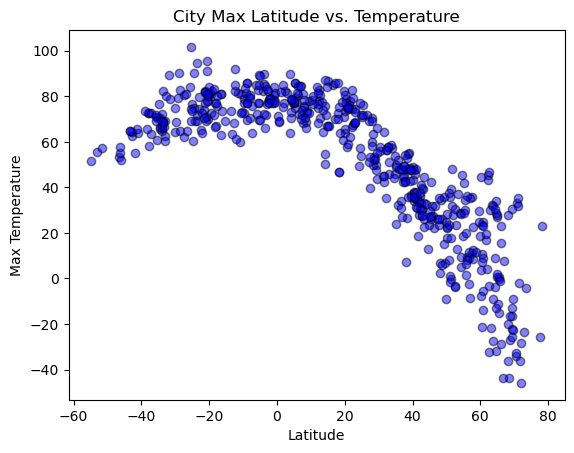

In [15]:
# Build scatter plot for latitude vs. temperature
latitude = city_data_df['Lat']
temperature = city_data_df['Max Temp']

plt.scatter(latitude, temperature, marker = 'o', alpha = .5, edgecolors = 'black', color = 'blue')

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

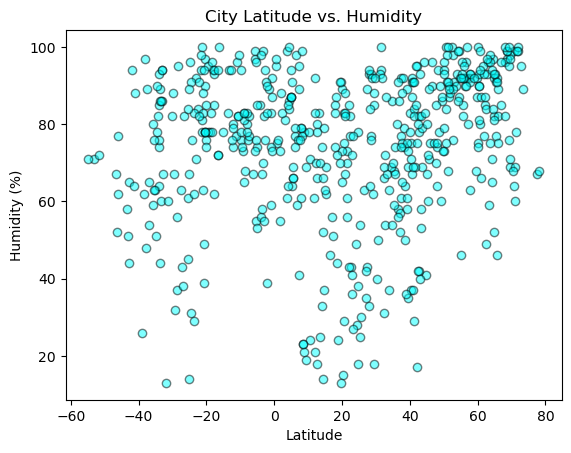

In [18]:
# Build the scatter plots for latitude vs. humidity
latitude = city_data_df['Lat']
humidity = city_data_df['Humidity']
plt.scatter(latitude, humidity, marker = 'o', edgecolors = 'black', alpha = .5, color = 'cyan')

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

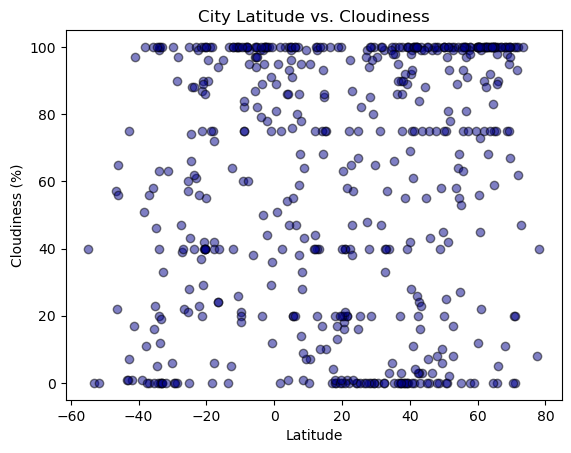

In [19]:
# Build the scatter plots for latitude vs. cloudiness
latitude = city_data_df['Lat']
cloudiness = city_data_df['Cloudiness']
plt.scatter(latitude, cloudiness, marker = 'o', edgecolors = 'black', color = 'darkblue', alpha = .5)

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

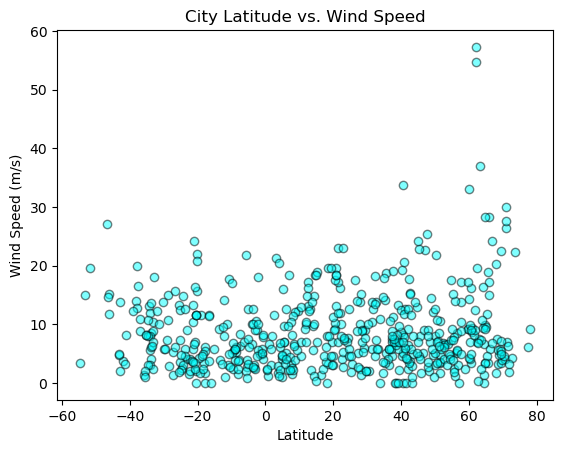

In [20]:
# Build the scatter plots for latitude vs. wind speed
latitude = city_data_df['Lat']
wind_speed = city_data_df['Wind Speed']
plt.scatter(latitude, wind_speed, marker = 'o', edgecolors = 'black', color = 'cyan', alpha = .5)

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [36]:
# Define a function to create Linear Regression plots
def calculate_regress(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = slope * x_values + intercept
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "-r")
    print("The r value is: " + str(rvalue))

In [26]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[(city_data_df['Lat'] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,san patricio,28.0170,-97.5169,70.39,93,94,10.09,US,1675831130
3,belaya gora,68.5333,146.4167,-43.82,99,75,3.24,RU,1675831131
6,kodiak,57.7900,-152.4072,22.51,63,0,17.27,US,1675831034
7,klaksvik,62.2266,-6.5890,45.50,85,100,57.27,FO,1675831132
9,georgetown,5.4112,100.3354,85.95,66,20,6.91,MY,1675830845


In [27]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[(city_data_df['Lat'] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,busselton,-33.6500,115.3333,82.53,44,0,8.59,AU,1675831130
2,caravelas,-17.7125,-39.2481,75.63,85,42,6.17,BR,1675831131
4,angoram,-4.0625,144.0661,82.36,85,99,6.62,PG,1675831131
5,bluff,-46.6000,168.3333,53.42,67,57,27.16,NZ,1675831132
8,samarai,-10.6167,150.6667,81.16,82,100,17.65,PG,1675831133


###  Temperature vs. Latitude Linear Regression Plot

The r value is: -0.8853475936615535


Text(0, 0.5, 'Temperature')

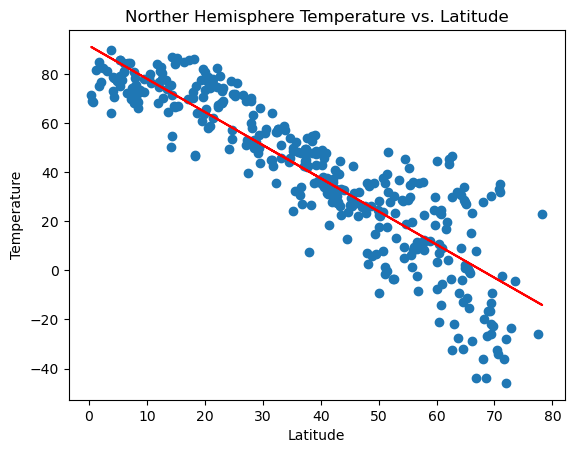

In [38]:
# Linear regression on Northern Hemisphere
calculate_regress(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])
plt.title("Northern Hemisphere Temperature vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Temperature')

The r value is: 0.536099267144142


Text(0, 0.5, 'Temperature')

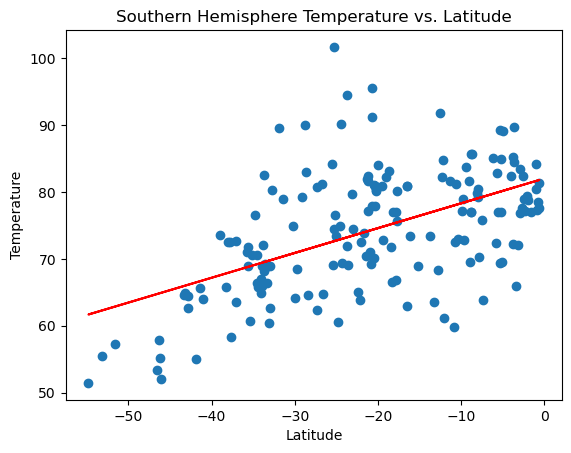

In [46]:
# Linear regression on Southern Hemisphere
calculate_regress(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])
plt.title("Southern Hemisphere Temperature vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Temperature')

**Discussion about the linear relationship:** 
The northern hemisphere has a very strong negative correlation with a -0.8 r value, while the southern hemisphere has a positive correlation however it is not as strong with only a 0.53 r value.

### Humidity vs. Latitude Linear Regression Plot

The r value is: 0.3464408275368122


Text(0, 0.5, 'Humidity')

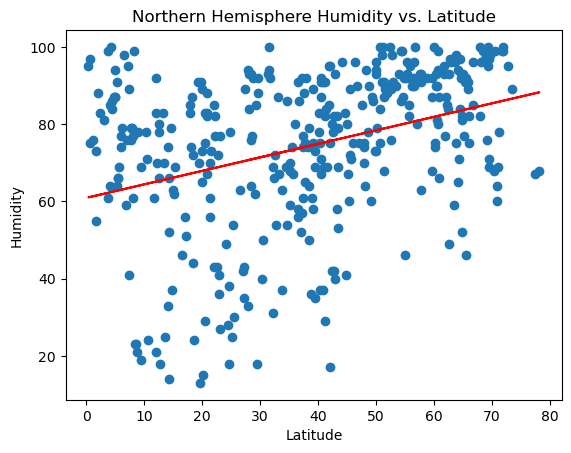

In [40]:
# Northern Hemisphere
calculate_regress(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])
plt.title("Northern Hemisphere Humidity vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Humidity')

The r value is: 0.24969803779013042


Text(0, 0.5, 'Humidity')

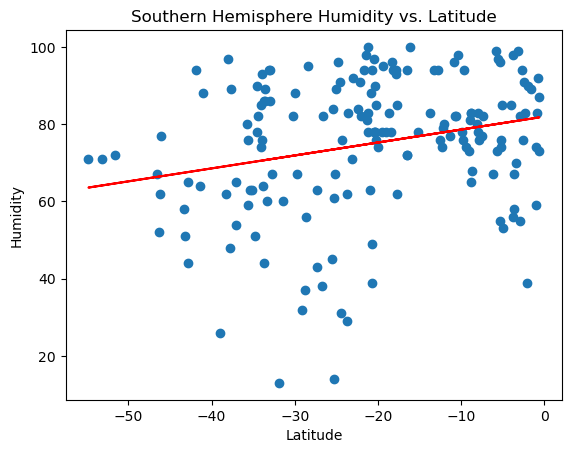

In [47]:
# Southern Hemisphere
calculate_regress(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])
plt.title("Southern Hemisphere Humidity vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Humidity')

**Discussion about the linear relationship:** Interestingly enough, the r values between the northern and southern hemispheres are very close to each other: north = 0.34, south = 0.24. Both have a positive slope however , the r values being closer to 0 implies less correlation.

### Cloudiness vs. Latitude Linear Regression Plot

The r value is: 0.20196124898084059


Text(0, 0.5, 'Cloudiness')

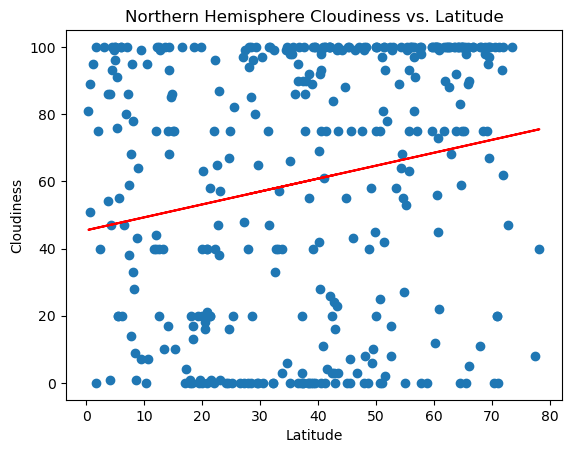

In [48]:
# Northern Hemisphere
calculate_regress(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])
plt.title("Northern Hemisphere Cloudiness vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

The r value is: 0.4539204556575298


Text(0, 0.5, 'Cloudiness')

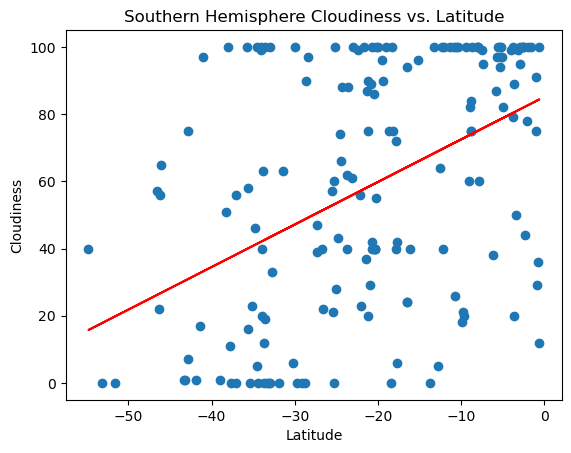

In [49]:
# Southern Hemisphere
calculate_regress(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])
plt.title("Southern Hemisphere Cloudiness vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

**Discussion about the linear relationship:** Similar to humidity, both hemispheres have a positive slope and r value, however it appears that there is a slightly higher r value for the southern hemisphere indicating slightly more correlation in the latitude and cloudiness for the southern hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r value is: 0.11011375788662864


Text(0, 0.5, 'Wind Speed')

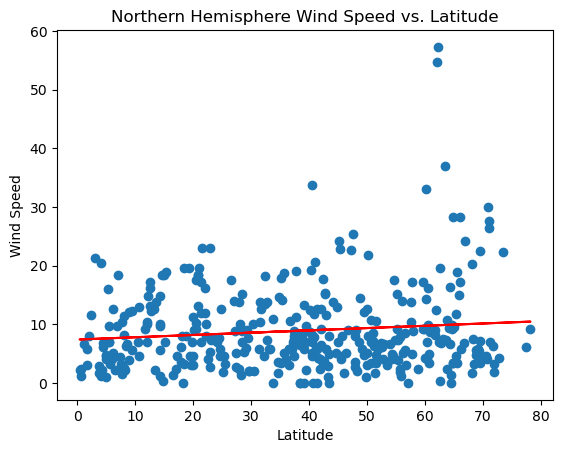

In [50]:
# Northern Hemisphere
calculate_regress(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])
plt.title("Northern Hemisphere Wind Speed vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

The r value is: -0.22459143801682063


Text(0, 0.5, 'Wind Speed')

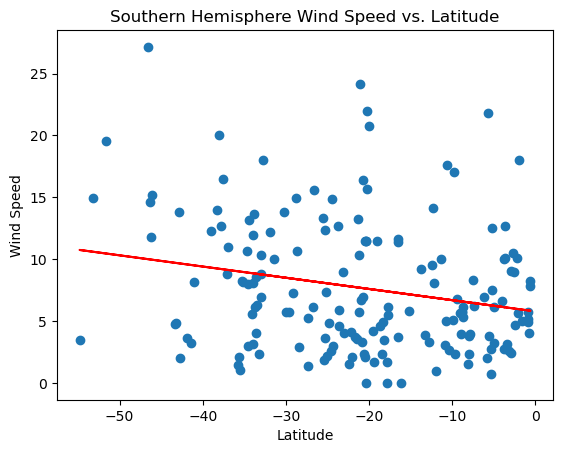

In [51]:
# Southern Hemisphere
calculate_regress(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])
plt.title("Southern Hemisphere Wind Speed vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

**Discussion about the linear relationship:** For wind speed, in both hemispheres the r value is very close to 1 indicating low correlation. However, there is still a slight trend upwards for the northern hemisphere and a slightly greater slope but in the negative direction in the southern hemisphere.